In [1]:
import pandas as pd 
import numpy as np 

In [2]:
def to_odd(num):
    if int(num) > 0:
        return round((float(num) / 100), 2)
    elif int(num) < 0:
        return 1


In [3]:
excel_to_df_2020 = pd.read_excel('nhl/nhl odds 2019-20.xlsx')
excel_to_df_2019 = pd.read_excel('nhl/nhl odds 2018-19.xlsx')
excel_to_df_2018 = pd.read_excel('nhl/nhl odds 2017-18.xlsx')
excel_to_df_2020.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,PuckLine,Unnamed: 11,OpenOU,Unnamed: 13,CloseOU,Unnamed: 15
0,1002,1,V,Ottawa,1,1,1,3,245,270,1.5,105,6.0,-110,6.5,-115
1,1002,2,H,Toronto,0,4,1,5,-300,-310,-1.5,-125,6.0,-110,6.5,-105
2,1002,3,V,Washington,1,1,0,3,115,135,1.5,-210,5.5,-110,5.5,-110
3,1002,4,H,St.Louis,2,0,0,2,-135,-150,-1.5,185,5.5,-110,5.5,-110
4,1002,5,V,Vancouver,0,1,1,2,105,116,1.5,-220,5.5,-110,5.5,-115


In [4]:
columns = ['Date', 'Home', 'Visitor', 'Home_Score', 'Visitor_Score', 'Home_Moneyline_Open', 'Home_Moneyline_Close', 'Visitor_Moneyline_Open', 'Visitor_Moneyline_Close',  
           'Home_Puckline', 'Home_Puckline_Odds',  'Visitor_Puckline', 'Visitor_Puckline_Odds', 'Game_Total_Open', 'Game_Total_Open_Odds',
          'Game_Total_Close', 'Game_Total_Close_Odds']
         
nhl_2020 = pd.DataFrame(columns=columns)
nhl_2019 = pd.DataFrame(columns=columns)
nhl_2018 = pd.DataFrame(columns=columns)

The first thing that must be done is convert all of the data from the excel sheet dataframes to a dataframe that has 
every row represent an individual game rather than every two rows. This is used to better organize the data we use 

In [5]:
nhl_2020['Home'] = pd.Series(excel_to_df_2020.iloc[1::2].Team.values)
nhl_2020['Home_Moneyline_Open'] = pd.Series(excel_to_df_2020.iloc[1::2].Open.values).astype(int)
nhl_2020['Home_Moneyline_Close'] = pd.Series(excel_to_df_2020.iloc[1::2].Close.values).astype(int)
nhl_2020['Home_Score'] = pd.Series(excel_to_df_2020.iloc[1::2].Final.values).astype(int)
nhl_2020['Home_Puckline'] = pd.Series(excel_to_df_2020.iloc[1::2, 10].values).astype(float)
nhl_2020['Home_Puckline_Odds'] = pd.Series(excel_to_df_2020.iloc[1::2, 11].values).astype(int)

#------------------
nhl_2020['Visitor'] = pd.Series(excel_to_df_2020.iloc[::2].Team.values)
nhl_2020['Visitor_Moneyline_Open'] = pd.Series(excel_to_df_2020.iloc[::2].Open.values).astype(int)
nhl_2020['Visitor_Moneyline_Close'] = pd.Series(excel_to_df_2020.iloc[::2].Close.values).astype(int)
nhl_2020['Visitor_Score'] = pd.Series(excel_to_df_2020.iloc[::2].Final.values).astype(int)
nhl_2020['Visitor_Puckline'] = pd.Series(excel_to_df_2020.iloc[::2, 10].values).astype(float)
nhl_2020['Visitor_Puckline_Odds'] = pd.Series(excel_to_df_2020.iloc[::2, 11].values).astype(int)

#------------------
nhl_2020['Date'] = pd.Series(excel_to_df_2020.iloc[::2].Date.values)
nhl_2020['Game_Total_Open'] = pd.Series(excel_to_df_2020.iloc[1::2, 12].values).astype(float)
nhl_2020['Game_Total_Open_Odds'] = pd.Series(excel_to_df_2020.iloc[1::2, 13].values).astype(int)
nhl_2020['Game_Total_Close'] = pd.Series(excel_to_df_2020.iloc[1::2, 14].values).astype(float)
nhl_2020['Game_Total_Close_Odds'] = pd.Series(excel_to_df_2020.iloc[1::2, 15].values).astype(int)


In [6]:
nhl_2019['Home'] = pd.Series(excel_to_df_2019.iloc[1::2].Team.values)
nhl_2019['Home_Moneyline_Open'] = pd.Series(excel_to_df_2019.iloc[1::2].Open.values).astype(int)
nhl_2019['Home_Moneyline_Close'] = pd.Series(excel_to_df_2019.iloc[1::2].Close.values).astype(int)
nhl_2019['Home_Score'] = pd.Series(excel_to_df_2019.iloc[1::2].Final.values).astype(int)
nhl_2019['Home_Puckline'] = pd.Series(excel_to_df_2019.iloc[1::2, 10].values).astype(float)
nhl_2019['Home_Puckline_Odds'] = pd.Series(excel_to_df_2019.iloc[1::2, 11].values).astype(int)

#------------------
nhl_2019['Visitor'] = pd.Series(excel_to_df_2019.iloc[::2].Team.values)
nhl_2019['Visitor_Moneyline_Open'] = pd.Series(excel_to_df_2019.iloc[::2].Open.values).astype(int)
nhl_2019['Visitor_Moneyline_Close'] = pd.Series(excel_to_df_2019.iloc[::2].Close.values).astype(int)
nhl_2019['Visitor_Score'] = pd.Series(excel_to_df_2019.iloc[::2].Final.values).astype(int)
nhl_2019['Visitor_Puckline'] = pd.Series(excel_to_df_2019.iloc[::2, 10].values).astype(float)
nhl_2019['Visitor_Puckline_Odds'] = pd.Series(excel_to_df_2019.iloc[::2, 11].values).astype(int)

#------------------
nhl_2019['Date'] = pd.Series(excel_to_df_2019.iloc[::2].Date.values)
nhl_2019['Game_Total_Open'] = pd.Series(excel_to_df_2019.iloc[1::2, 12].values).astype(float)
nhl_2019['Game_Total_Open_Odds'] = pd.Series(excel_to_df_2019.iloc[1::2, 13].values).astype(int)
nhl_2019['Game_Total_Close'] = pd.Series(excel_to_df_2019.iloc[1::2, 14].values).astype(float)
nhl_2019['Game_Total_Close_Odds'] = pd.Series(excel_to_df_2019.iloc[1::2, 15].values).astype(int)

In [7]:
nhl_2018['Home'] = pd.Series(excel_to_df_2018.iloc[1::2].Team.values)
nhl_2018['Home_Moneyline_Open'] = pd.Series(excel_to_df_2018.iloc[1::2].Open.values).astype(int)
nhl_2018['Home_Moneyline_Close'] = pd.Series(excel_to_df_2018.iloc[1::2].Close.values).astype(int)
nhl_2018['Home_Score'] = pd.Series(excel_to_df_2018.iloc[1::2].Final.values).astype(int)
nhl_2018['Home_Puckline'] = pd.Series(excel_to_df_2018.iloc[1::2, 10].values).astype(float)
nhl_2018['Home_Puckline_Odds'] = pd.Series(excel_to_df_2018.iloc[1::2, 11].values).astype(int)

#------------------
nhl_2018['Visitor'] = pd.Series(excel_to_df_2018.iloc[::2].Team.values)
nhl_2018['Visitor_Moneyline_Open'] = pd.Series(excel_to_df_2018.iloc[::2].Open.values).astype(int)
nhl_2018['Visitor_Moneyline_Close'] = pd.Series(excel_to_df_2018.iloc[::2].Close.values).astype(int)
nhl_2018['Visitor_Score'] = pd.Series(excel_to_df_2018.iloc[::2].Final.values).astype(int)
nhl_2018['Visitor_Puckline'] = pd.Series(excel_to_df_2018.iloc[::2, 10].values).astype(float)
nhl_2018['Visitor_Puckline_Odds'] = pd.Series(excel_to_df_2018.iloc[::2, 11].values).astype(int)

#------------------
nhl_2018['Date'] = pd.Series(excel_to_df_2018.iloc[::2].Date.values)
nhl_2018['Game_Total_Open'] = pd.Series(excel_to_df_2018.iloc[1::2, 12].values).astype(float)
nhl_2018['Game_Total_Open_Odds'] = pd.Series(excel_to_df_2018.iloc[1::2, 13].values).astype(int)
nhl_2018['Game_Total_Close'] = pd.Series(excel_to_df_2018.iloc[1::2, 14].values).astype(float)
nhl_2018['Game_Total_Close_Odds'] = pd.Series(excel_to_df_2018.iloc[1::2, 15].values).astype(int)


<h3>Convert the Date column to a datetime object</h3>

In [8]:
from datetime import datetime

date_list = nhl_2020['Date'].astype(str)

updated = []
for date in date_list:
    """
    Takes the original stirng and converts to datetime object. Hardcodes the year 
    """
    date = [el for el in date]
    date.insert(-2, '-')
    if len(date) == 4:
        date.insert(0, '0')
        
    if date[0] == '0':
        date.insert(5, '-2020')
    else:
        date.insert(5, '-2019')
        
    date = "".join(date)
    date = datetime.strptime(date, '%m-%d-%Y')
    updated.append(date)

nhl_2020['Date'] = updated

In [9]:
from datetime import datetime

date_list = nhl_2019['Date'].astype(str)

updated = []
for date in date_list:
    """
    Takes the original stirng and converts to datetime object. Hardcodes the year 
    """
    date = [el for el in date]
    date.insert(-2, '-')
    if len(date) == 4:
        date.insert(0, '0')
        
    if date[0] == '0':
        date.insert(5, '-2019')
    else:
        date.insert(5, '-2018')
        
    date = "".join(date)
    date = datetime.strptime(date, '%m-%d-%Y')
    updated.append(date)

nhl_2019['Date'] = updated

In [10]:
from datetime import datetime

date_list = nhl_2018['Date'].astype(str)

updated = []
for date in date_list:
    """
    Takes the original stirng and converts to datetime object. Hardcodes the year 
    """
    date = [el for el in date]
    date.insert(-2, '-')
    if len(date) == 4:
        date.insert(0, '0')
        
    if date[0] == '0':
        date.insert(5, '-2018')
    else:
        date.insert(5, '-2017')
        
    date = "".join(date)
    date = datetime.strptime(date, '%m-%d-%Y')
    updated.append(date)

nhl_2018['Date'] = updated

In [11]:
for row in nhl_2020.iterrows():
    print(row)

(0, Date                       2019-10-02 00:00:00
Home                                   Toronto
Visitor                                 Ottawa
Home_Score                                   5
Visitor_Score                                3
Home_Moneyline_Open                       -300
Home_Moneyline_Close                      -310
Visitor_Moneyline_Open                     245
Visitor_Moneyline_Close                    270
Home_Puckline                             -1.5
Home_Puckline_Odds                        -125
Visitor_Puckline                           1.5
Visitor_Puckline_Odds                      105
Game_Total_Open                              6
Game_Total_Open_Odds                      -110
Game_Total_Close                           6.5
Game_Total_Close_Odds                     -105
Name: 0, dtype: object)
(1, Date                       2019-10-02 00:00:00
Home                                  St.Louis
Visitor                             Washington
Home_Score                  

Name: 229, dtype: object)
(230, Date                       2019-11-05 00:00:00
Home                                   Calgary
Visitor                                Arizona
Home_Score                                   4
Visitor_Score                                3
Home_Moneyline_Open                       -155
Home_Moneyline_Close                      -155
Visitor_Moneyline_Open                     135
Visitor_Moneyline_Close                    140
Home_Puckline                             -1.5
Home_Puckline_Odds                         160
Visitor_Puckline                           1.5
Visitor_Puckline_Odds                     -180
Game_Total_Open                            5.5
Game_Total_Open_Odds                      -110
Game_Total_Close                           5.5
Game_Total_Close_Odds                     -105
Name: 230, dtype: object)
(231, Date                       2019-11-05 00:00:00
Home                                   SanJose
Visitor                                Chic

(396, Date                       2019-11-29 00:00:00
Home                                 Minnesota
Visitor                                 Ottawa
Home_Score                                   7
Visitor_Score                                2
Home_Moneyline_Open                       -177
Home_Moneyline_Close                      -172
Visitor_Moneyline_Open                     152
Visitor_Moneyline_Close                    156
Home_Puckline                             -1.5
Home_Puckline_Odds                         135
Visitor_Puckline                           1.5
Visitor_Puckline_Odds                     -155
Game_Total_Open                              6
Game_Total_Open_Odds                      -110
Game_Total_Close                           5.5
Game_Total_Close_Odds                      100
Name: 396, dtype: object)
(397, Date                       2019-11-29 00:00:00
Home                                Washington
Visitor                               TampaBay
Home_Score            

Name: 550, dtype: object)
(551, Date                       2019-12-21 00:00:00
Home                               NYIslanders
Visitor                                Anaheim
Home_Score                                   5
Visitor_Score                                6
Home_Moneyline_Open                       -190
Home_Moneyline_Close                      -165
Visitor_Moneyline_Open                     163
Visitor_Moneyline_Close                    150
Home_Puckline                             -1.5
Home_Puckline_Odds                         155
Visitor_Puckline                           1.5
Visitor_Puckline_Odds                     -175
Game_Total_Open                              5
Game_Total_Open_Odds                      -110
Game_Total_Close                             5
Game_Total_Close_Odds                      110
Name: 551, dtype: object)
(552, Date                       2019-12-21 00:00:00
Home                                   Buffalo
Visitor                             LosAnge

Name: 703, dtype: object)
(704, Date                       2020-01-12 00:00:00
Home                                   Detroit
Visitor                                Buffalo
Home_Score                                   1
Visitor_Score                                5
Home_Moneyline_Open                        120
Home_Moneyline_Close                       112
Visitor_Moneyline_Open                    -140
Visitor_Moneyline_Close                   -122
Home_Puckline                              1.5
Home_Puckline_Odds                        -220
Visitor_Puckline                          -1.5
Visitor_Puckline_Odds                      195
Game_Total_Open                              6
Game_Total_Open_Odds                      -110
Game_Total_Close                           5.5
Game_Total_Close_Odds                     -115
Name: 704, dtype: object)
(705, Date                       2020-01-12 00:00:00
Home                                   Arizona
Visitor                             Pittsbu

Name: 866, dtype: object)
(867, Date                       2020-02-11 00:00:00
Home                                Pittsburgh
Visitor                               TampaBay
Home_Score                                   1
Visitor_Score                                2
Home_Moneyline_Open                       -115
Home_Moneyline_Close                      -115
Visitor_Moneyline_Open                    -105
Visitor_Moneyline_Close                    105
Home_Puckline                             -1.5
Home_Puckline_Odds                         220
Visitor_Puckline                           1.5
Visitor_Puckline_Odds                     -250
Game_Total_Open                            6.5
Game_Total_Open_Odds                      -110
Game_Total_Close                             6
Game_Total_Close_Odds                     -110
Name: 867, dtype: object)
(868, Date                       2020-02-11 00:00:00
Home                                 NewJersey
Visitor                                Flor

Name: 919, dtype: object)
(920, Date                       2020-02-18 00:00:00
Home                                   Detroit
Visitor                               Montreal
Home_Score                                   4
Visitor_Score                                3
Home_Moneyline_Open                        160
Home_Moneyline_Close                       180
Visitor_Moneyline_Open                    -185
Visitor_Moneyline_Close                   -200
Home_Puckline                              1.5
Home_Puckline_Odds                        -150
Visitor_Puckline                          -1.5
Visitor_Puckline_Odds                      130
Game_Total_Open                            5.5
Game_Total_Open_Odds                      -110
Game_Total_Close                           5.5
Game_Total_Close_Odds                     -120
Name: 920, dtype: object)
(921, Date                       2020-02-18 00:00:00
Home                                    Ottawa
Visitor                                Buff

In [12]:
nhl_2019.head(10)

,Date,Home,Visitor,Home_Score,Visitor_Score,Home_Moneyline_Open,Home_Moneyline_Close,Visitor_Moneyline_Open,Visitor_Moneyline_Close,Home_Puckline,Home_Puckline_Odds,Visitor_Puckline,Visitor_Puckline_Odds,Game_Total_Open,Game_Total_Open_Odds,Game_Total_Close,Game_Total_Close_Odds
0,2018-10-03,Toronto,Montreal,3,2,-220,-240,184,210,-1.5,105,1.5,-125,6.0,-110,6.0,-110
1,2018-10-03,Washington,Boston,7,0,-135,-115,115,105,-1.5,230,1.5,-290,5.5,-110,5.5,100
2,2018-10-03,Vancouver,Calgary,5,2,110,120,-130,-130,1.5,-240,-1.5,200,5.5,-110,5.5,-105
3,2018-10-03,SanJose,Anaheim,2,5,-170,-180,148,160,-1.5,165,1.5,-185,5.5,-110,5.5,-120
4,2018-10-04,Pittsburgh,Washington,7,6,-160,-160,140,145,-1.5,170,1.5,-200,6.0,-110,6.0,105
5,2018-10-04,Carolina,NYIslanders,1,2,-140,-165,120,150,-1.5,170,1.5,-200,6.0,-110,6.5,-125
6,2018-10-04,Buffalo,Boston,0,4,100,125,-120,-135,1.5,-215,-1.5,185,5.5,-110,6.0,-120
7,2018-10-04,Detroit,Columbus,2,3,120,120,-140,-130,1.5,-260,-1.5,210,5.5,-110,5.5,105
8,2018-10-04,Ottawa,Chicago,3,4,100,102,-120,-112,1.5,-265,-1.5,215,6.0,-110,6.0,-115
9,2018-10-04,NYRangers,Nashville,2,3,-160,160,140,-180,1.5,-200,-1.5,170,6.0,-110,6.0,-120


In [13]:
nhl_2019.head(10)

,Date,Home,Visitor,Home_Score,Visitor_Score,Home_Moneyline_Open,Home_Moneyline_Close,Visitor_Moneyline_Open,Visitor_Moneyline_Close,Home_Puckline,Home_Puckline_Odds,Visitor_Puckline,Visitor_Puckline_Odds,Game_Total_Open,Game_Total_Open_Odds,Game_Total_Close,Game_Total_Close_Odds
0,2018-10-03,Toronto,Montreal,3,2,-220,-240,184,210,-1.5,105,1.5,-125,6.0,-110,6.0,-110
1,2018-10-03,Washington,Boston,7,0,-135,-115,115,105,-1.5,230,1.5,-290,5.5,-110,5.5,100
2,2018-10-03,Vancouver,Calgary,5,2,110,120,-130,-130,1.5,-240,-1.5,200,5.5,-110,5.5,-105
3,2018-10-03,SanJose,Anaheim,2,5,-170,-180,148,160,-1.5,165,1.5,-185,5.5,-110,5.5,-120
4,2018-10-04,Pittsburgh,Washington,7,6,-160,-160,140,145,-1.5,170,1.5,-200,6.0,-110,6.0,105
5,2018-10-04,Carolina,NYIslanders,1,2,-140,-165,120,150,-1.5,170,1.5,-200,6.0,-110,6.5,-125
6,2018-10-04,Buffalo,Boston,0,4,100,125,-120,-135,1.5,-215,-1.5,185,5.5,-110,6.0,-120
7,2018-10-04,Detroit,Columbus,2,3,120,120,-140,-130,1.5,-260,-1.5,210,5.5,-110,5.5,105
8,2018-10-04,Ottawa,Chicago,3,4,100,102,-120,-112,1.5,-265,-1.5,215,6.0,-110,6.0,-115
9,2018-10-04,NYRangers,Nashville,2,3,-160,160,140,-180,1.5,-200,-1.5,170,6.0,-110,6.0,-120


<h1>Vegas Hangover in Arizona</h1>

<h3>Overview</h3>
The Arizona Coyotes have been a subpar team over the last 4 years in the NHL <br>
2018: 29-41-12<br>
2019: 39-35-8<br>
Combine Record 68-76-20<br>
BLAH

Teams like the Coyotes get overlooked by the casual bettor because of their lack of star power, lack of fanbase, 
and lack of publicity. However looking closer at their data there is one addition to the NHL that creates huge 
betting value for the Coyotes. The Vegas Hangover. 

<h4>Breaking Down the Vegas Hangover</h4>
The Theroy goes most of the time when an NHL team goes on a road trip given the geography of the 
pacific division they typically play the newly founded Vegas Golden Knights, before heading a few hours down 
to Pheonix Arizona a day or so later to play the Coyotes. Some people predict that given the atmosphere in Las Vegas 
the sorry Yotes feast off teams coming into their building "Hungover" after playing the Knights beforehand. 

We all know "What Happens in Vegas Stays in Vegas" but does this apply to professional hockey players in the 
middle of their season? Lets dive into the data and find out. 



<h2>Organize the Data</h2>

Lets slice up our dataframes of the seasons to all of the arizona home games, and find games where the visitor 
team plays Vegas in their previous game. To do this we iter through our sliced Arizona dataframe, and with each iteration we take the index relative to the main df, and iterate walking backwords to 0 to find if the visiting team (row['visitor']) played there last game in Las Vegas. If so we break the loop and add the row to our list.    

In [14]:
arizona2020 = nhl_2020.loc[nhl_2020['Home'] == 'Arizona']
arizona2019 = nhl_2019.loc[nhl_2019['Home'] == 'Arizona'] 
arizona2018 = nhl_2018.loc[nhl_2018['Home'] == 'Arizona'] 

arizona_flu_2020 = []
arizona_flu_2019 = []
arizona_flu_2018 = []


for index, row in arizona2020.iterrows():
    for i in range(index, 0, -1):
        if nhl_2020.iloc[i, 1] == 'Vegas' and nhl_2020.iloc[i, 2] == row['Visitor']:
            time_inbetween = row['Date'] - nhl_2020.iloc[i, 0]
            if time_inbetween.days <= 3:
                arizona_flu_2020.append(row)
                break 
            
for index, row in arizona2019.iterrows():
    for i in range(index, 0, -1):
        if nhl_2019.iloc[i, 1] == 'Vegas' and nhl_2019.iloc[i, 2] == row['Visitor']:
            time_inbetween = row['Date'] - nhl_2019.iloc[i, 0]
            if time_inbetween.days <= 3:
                arizona_flu_2019.append(row)
                break  
            
for index, row in arizona2018.iterrows():
    for i in range(index, 0, -1):
        if nhl_2018.iloc[i, 1] == 'Vegas' and nhl_2018.iloc[i, 2] == row['Visitor']:
            time_inbetween = row['Date'] - nhl_2018.iloc[i, 0]
            if time_inbetween.days <= 3:
                arizona_flu_2018.append(row)
                break 

In [15]:
arizona2020.head(10)

,Date,Home,Visitor,Home_Score,Visitor_Score,Home_Moneyline_Open,Home_Moneyline_Close,Visitor_Moneyline_Open,Visitor_Moneyline_Close,Home_Puckline,Home_Puckline_Odds,Visitor_Puckline,Visitor_Puckline_Odds,Game_Total_Open,Game_Total_Open_Odds,Game_Total_Close,Game_Total_Close_Odds
26,2019-10-05,Arizona,Boston,0,1,113,126,-133,-136,1.5,-220,-1.5,195,5.5,-110,5.5,-120
56,2019-10-10,Arizona,Vegas,4,1,135,110,-155,-120,1.5,-210,-1.5,185,5.5,-110,5.5,100
104,2019-10-17,Arizona,Nashville,5,2,113,-103,-133,-107,1.5,-230,-1.5,200,6.0,-110,6.0,-115
117,2019-10-19,Arizona,Ottawa,5,2,-200,-230,170,205,-1.5,110,1.5,-130,6.0,-110,6.0,-110
190,2019-10-30,Arizona,Montreal,1,4,-127,-125,107,115,-1.5,195,1.5,-220,5.5,-110,6.0,-110
213,2019-11-02,Arizona,Colorado,3,0,-130,-145,110,132,-1.5,180,1.5,-205,5.5,-110,5.5,100
245,2019-11-07,Arizona,Columbus,2,3,-163,-140,143,130,-1.5,170,1.5,-190,5.5,-110,5.5,-115
258,2019-11-09,Arizona,Minnesota,3,4,-148,-135,128,125,-1.5,185,1.5,-210,5.0,-110,5.5,-140
301,2019-11-16,Arizona,Calgary,3,0,-130,-110,110,100,-1.5,230,1.5,-260,5.5,-110,5.5,-120
316,2019-11-18,Arizona,LosAngeles,3,0,-175,-165,151,150,-1.5,155,1.5,-175,5.5,-110,5.5,-120


<h2>Find ROI</h2>

Next we have to determine our return on investment. This is based off of a unit scale. My caculations are on 
the bettor paying the juice for his favorites (-150 bet he will risk 1.5u to win 1) and always bets 1u on dogs (+120 bet he will risk 1u to win 1.2)

For both seasons, if the yotes win we calculate the payout you would recieve and add it to the ROI value, we 
keep track of the current ROI Value to track this trend over time. Again this is assuming the bettor pays his juice 
on favorites 

In [17]:
import matplotlib.pyplot as plt

roi = 0

lis_2019 = []
lis_2018 = []
lis_2020 = []

for game in arizona_flu_2018:
    if game['Home_Score'] > game['Visitor_Score']:
        winnings = to_odd(game['Home_Moneyline_Close'])
        roi += winnings
        lis_2018.append([game['Date'], roi])
        
    else:
        if int(game['Home_Moneyline_Close']) < 0:
            roi -= abs(float(game['Home_Moneyline_Close']/100))
            lis_2018.append([game['Date'], roi])
        else:
            roi -= 1
            lis_2018.append([game['Date'], roi])

for game in arizona_flu_2019:
    if game['Home_Score'] > game['Visitor_Score']:
        winnings = to_odd(game['Home_Moneyline_Close'])
        roi += winnings
        lis_2019.append([game['Date'], roi])
        
    else:
        if int(game['Home_Moneyline_Close']) < 0:
            roi -= abs(float(game['Home_Moneyline_Close']/100))
            lis_2019.append([game['Date'], roi])
        else:
            roi -= 1
            lis_2019.append([game['Date'], roi])

for game in arizona_flu_2020:
    if game['Home_Score'] > game['Visitor_Score']:
        winnings = to_odd(game['Home_Moneyline_Close'])
        roi += winnings
        lis_2020.append([game['Date'], roi])
        
    else:
        if int(game['Home_Moneyline_Close']) < 0:
            roi -= abs(float(game['Home_Moneyline_Close']/100))
            lis_2020.append([game['Date'], roi])
        else:
            roi -= 1
            lis_2020.append([game['Date'], roi])

<h2>Plot</h2>

<b>Now that we have our ROI data all organized we can plot it out</b> 

If at the start of the 2018 NHL season you decided to go to a sportbook and place 100 dollar wager (or payed whatever juice to win 100) on every Home Yotes game vs. a team coming off Vegas you would be up roughly $730 by now (March 8th 2020). 

33
7.300000000000001


<IPython.core.display.Javascript object>


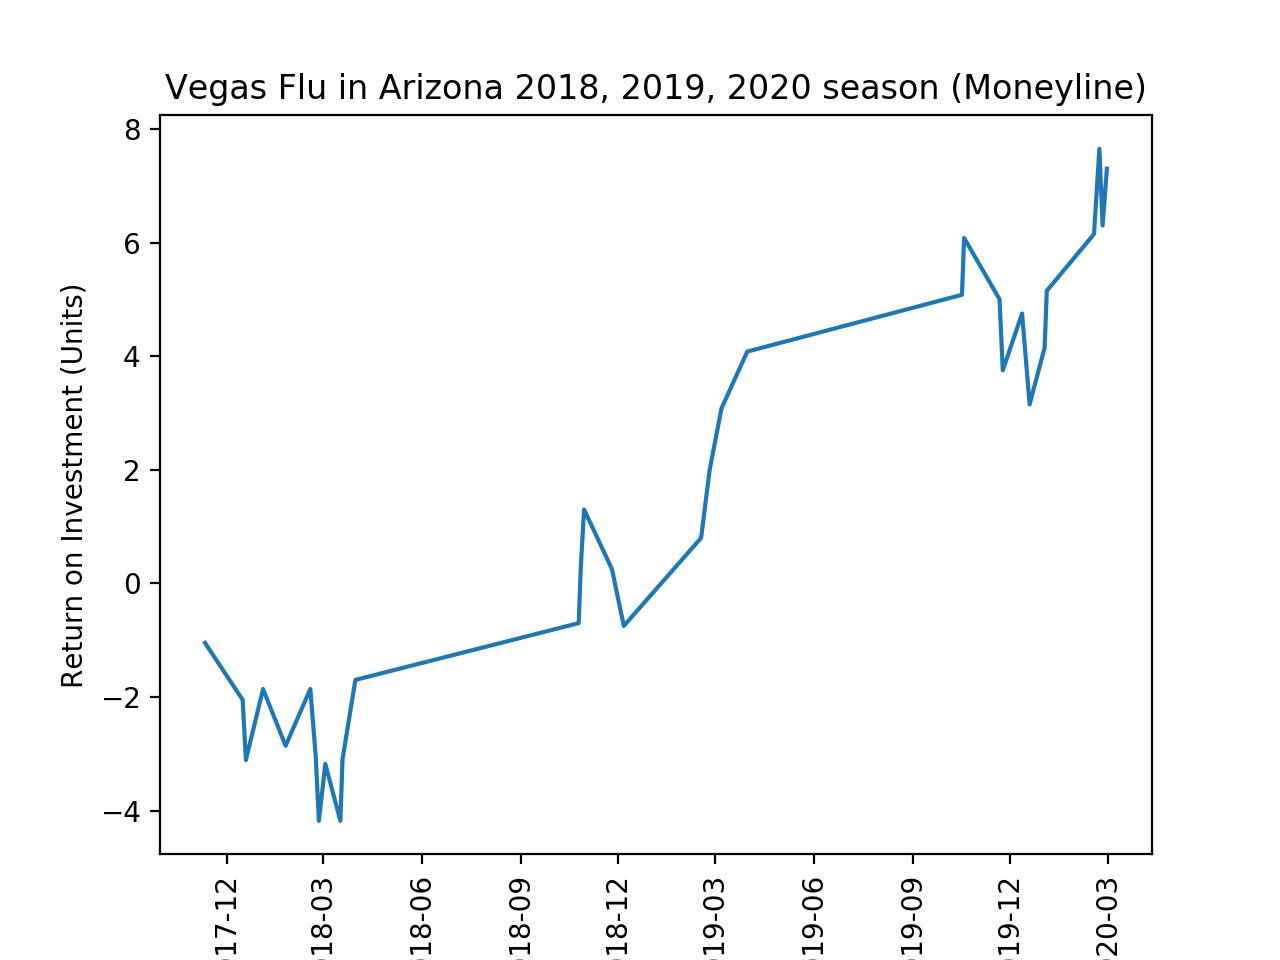

Text(0.5,1,'Vegas Flu in Arizona 2018, 2019, 2020 season (Moneyline)')

In [31]:
%matplotlib notebook

lis = lis_2018 + lis_2019 + lis_2020
lis = np.array(lis)
print(len(lis))
print(roi)

plt.plot(lis[:, 0], lis[:, 1])
plt.xticks(rotation='vertical')
plt.ylabel("Return on Investment (Units)")
plt.xlabel("Date")
plt.title("Vegas Flu in Arizona 2018, 2019, 2020 season (Moneyline)")


<h3>The Puckline</h3>

Since betting the Yotes moneyline seems to be profitable overtime we can see how fairly they boast against the puckline. Covering the puckline in hockey means the Fav has to win by 2 or more goals. Usually if a team is underdogged on the puckline you have to pay a heafty amount of juice to win 1u 

In [28]:
puckline_roi = 0

puckline_2018 = []
puckline_2019 = []
puckline_2020 = [] 

for game in arizona_flu_2018:
  
    if game['Home_Puckline'] == -1.5:
        if game['Home_Score'] - game['Visitor_Score'] >= 2:
            
            winnings = to_odd(game['Home_Puckline_Odds'])
            puckline_roi += winnings
            puckline_2018.append([game['Date'], puckline_roi])
        else:
            puckline_roi -= abs(float(game['Home_Puckline_Odds']/100))
            puckline_2018.append([game['Date'], puckline_roi])
        
           
    elif game['Home_Puckline'] == 1.5:
        if game['Visitor_Score'] - game['Home_Score'] < 2:
           
            winnings = to_odd(game['Home_Puckline_Odds'])
            puckline_roi += winnings
            puckline_2018.append([game['Date'], puckline_roi])
        else:
            puckline_roi -= abs(float(game['Home_Puckline_Odds']/100))
            puckline_2018.append([game['Date'], puckline_roi]) 

for game in arizona_flu_2019:
    if game['Home_Puckline'] == -1.5:
        if game['Home_Score'] - game['Visitor_Score'] >= 2:
            
            winnings = to_odd(game['Home_Puckline_Odds'])
            puckline_roi += winnings
            puckline_2019.append([game['Date'], puckline_roi])
        else:
            puckline_roi -= abs(float(game['Home_Puckline_Odds']/100))
            puckline_2019.append([game['Date'], puckline_roi])
        
           
    elif game['Home_Puckline'] == 1.5:
        if game['Visitor_Score'] - game['Home_Score'] < 2:
           
            winnings = to_odd(game['Home_Puckline_Odds'])
            puckline_roi += winnings
            puckline_2019.append([game['Date'], puckline_roi])
        else:
            puckline_roi -= abs(float(game['Home_Puckline_Odds']/100))
            puckline_2019.append([game['Date'], puckline_roi]) 

for game in arizona_flu_2020:
    if game['Home_Puckline'] == -1.5:
        if game['Home_Score'] - game['Visitor_Score'] >= 2:
            
            winnings = to_odd(game['Home_Puckline_Odds'])
            puckline_roi += winnings
            puckline_2020.append([game['Date'], puckline_roi])
        else:
            puckline_roi -= abs(float(game['Home_Puckline_Odds']/100))
            puckline_2020.append([game['Date'], puckline_roi])
        
           
    elif game['Home_Puckline'] == 1.5:
        if game['Visitor_Score'] - game['Home_Score'] < 2:
           
            winnings = to_odd(game['Home_Puckline_Odds'])
            puckline_roi += winnings
            puckline_2020.append([game['Date'], puckline_roi])
        else:
            puckline_roi -= abs(float(game['Home_Puckline_Odds']/100))
            puckline_2020.append([game['Date'], puckline_roi]) 

33
-4.8100000000000005


<IPython.core.display.Javascript object>


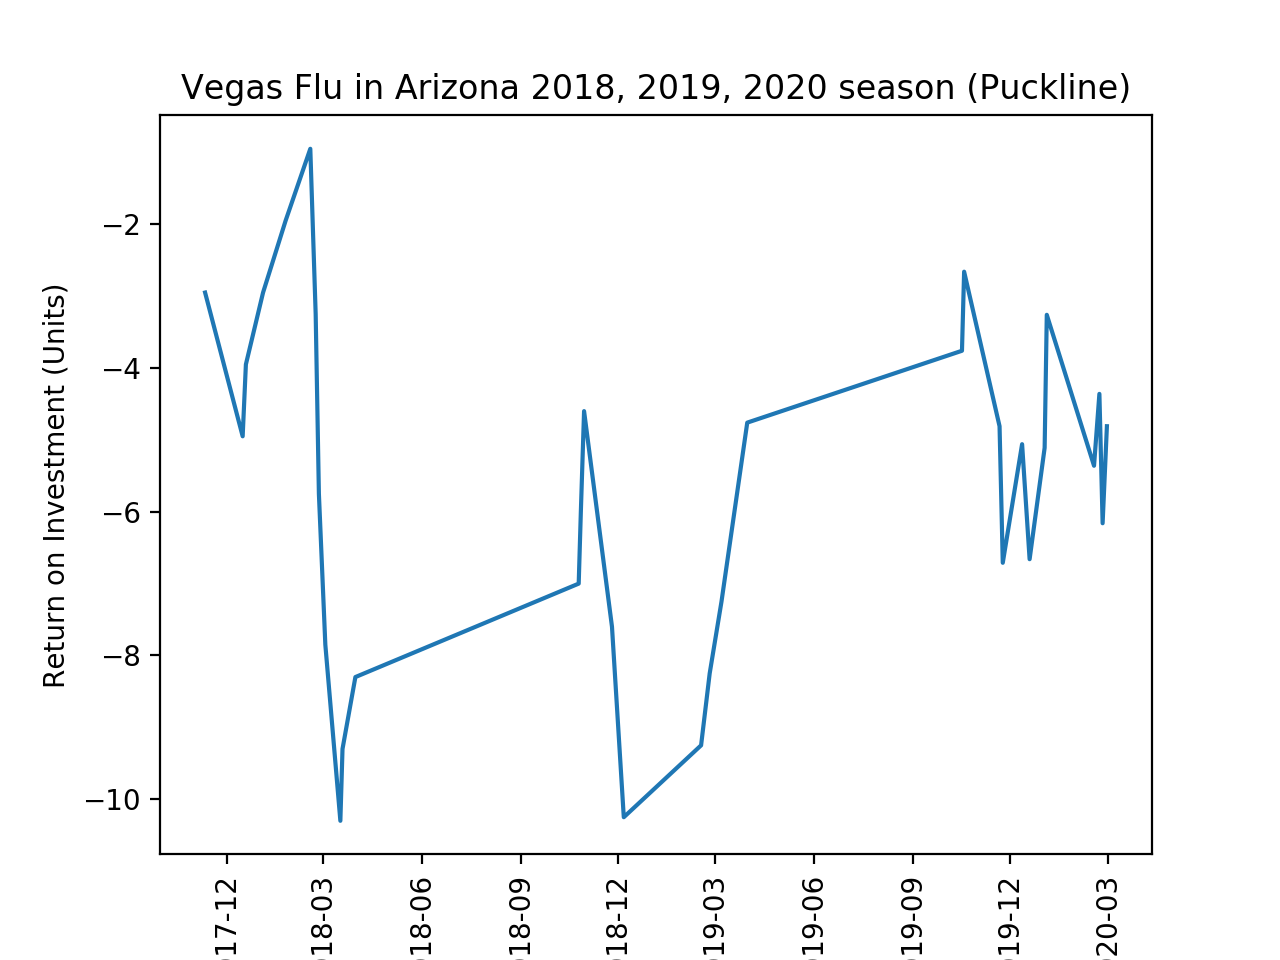

Text(0.5,1,'Vegas Flu in Arizona 2018, 2019, 2020 season (Puckline)')

In [30]:
lis = puckline_2018 + puckline_2019 + puckline_2020
lis = np.array(lis)
print(len(lis))
print(puckline_roi)

plt.plot(lis[:, 0], lis[:, 1])
plt.xticks(rotation='vertical')
plt.ylabel("Return on Investment (Units)")
plt.xlabel("Date")
plt.title("Vegas Flu in Arizona 2018, 2019, 2020 season (Puckline)")
